# Background
Data that simulates the behavior of Cafe Rewards members over a 30-day period, including their transactions and responses to promotional offers.

Customers receive offers once every few days and have a limited time to redeem them. These can be informational offers (simple advertisement of a product), discount offers, or 'buy one, get one' (BOGO) offers. Each customer receives a different mix of offers, attempting to maximize their probability of making a purchase.

Every customer purchase during the period is marked as a transaction. For a transaction to be attributed to an offer, it must occur at the same time as when the offer was 'completed' by the customer.

https://www.kaggle.com/datasets/siddharth0935/cafe-rewards-offers/data?select=customers.csv

The notebook contains:
- [Import Libraries & Dataset](#import)
- [Dataset overview](#overview)
    * [Customers](#overview_customers)
    * [Offers](#overview_offers)
    * [Events](#overview_events)

# Import Libraries & Dataset
<a id=import></a>

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('customers.csv')
events = pd.read_csv('events.csv')
offers = pd.read_csv('offers.csv')

# Dataset overview
<a id=overview></a>

## Customers
<a id=overview_customers></a>

The customer dataset consists demographic data of 17,000 customers. Each row represents a customer with the details of:
- customer_id: unique identifier of each customer
- became_member_on: date became member recorded as datatime format 'YYYYMMDD'
- gender: gender of customers as M/F/O
- age: age of customers
- income: customers' annual income in USD

The dataset has **2175** customers with **missing data** in gender and income, which is approximately **12.5%** of the dataset. However, **age** of the missing customers are all set at **118**. Hence, any analysis related to demographic data should conduct missing data imputing or remove the missing ones to avoid misleading.

In [32]:
customers.head()

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,118,NaN
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,118,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0
4,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,118,NaN


In [33]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17000 non-null  object 
 1   became_member_on  17000 non-null  int64  
 2   gender            14825 non-null  object 
 3   age               17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [34]:
customers.isna().sum()

customer_id            0
became_member_on       0
gender              2175
age                    0
income              2175
dtype: int64

In [35]:
customers.describe().round(2)

,became_member_on,age,income
count,17000.00,17000.00,14825.00
mean,20167034.23,62.53,65404.99
std,11677.50,26.74,21598.30
min,20130729.00,18.00,30000.00
25%,20160526.00,45.00,49000.00
50%,20170802.00,58.00,64000.00
75%,20171230.00,73.00,80000.00
max,20180726.00,118.00,120000.00


In [36]:
customers['became_member_on'] = pd.to_datetime(customers['became_member_on'], format='%Y%m%d')
customers['year'] = customers['became_member_on'].dt.year
max_year = customers['year'].max()
customers['tenure'] = max_year - customers['year']
customers_clean = customers.dropna()
customers_clean.describe().round(2)

,became_member_on,age,income,year,tenure
count,14825,14825.00,14825.00,14825.00,14825.00
mean,2017-02-18 12:30:15.419898880,54.39,65404.99,2016.62,1.38
min,2013-07-29 00:00:00,18.00,30000.00,2013.00,0.00
25%,2016-05-20 00:00:00,42.00,49000.00,2016.00,1.00
50%,2017-08-02 00:00:00,55.00,64000.00,2017.00,1.00
75%,2017-12-30 00:00:00,66.00,80000.00,2017.00,2.00
max,2018-07-26 00:00:00,101.00,120000.00,2018.00,5.00
std,NaN,17.38,21598.30,1.20,1.20


## Offers
<a id=overview_offers></a>

The dataset consists of 10 type of offers:
- offer_id: unique identifier of the offer
- offer_type: 3 type of offer
    * Informational: an advertisement
    * bogo: Buy one Get one
    * Discount: discount offer
- difficulty: the minimum amount in USD the customer need to spend to claim the offer
- reward: the amount in USD obtained from claiming the offer
- duration: number of days the customer need to complete the offer before expiration
- channels: list of marketing channel used to engage customer

In [37]:
offers

,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']"
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,"['web', 'email', 'mobile']"
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,"['web', 'email']"
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7,3,7,"['web', 'email', 'mobile', 'social']"
6,fafdcd668e3743c1bb461111dcafc2a4,discount,10,2,10,"['web', 'email', 'mobile', 'social']"
7,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,3,"['email', 'mobile', 'social']"
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,5,5,"['web', 'email', 'mobile', 'social']"
9,2906b810c7d4411798c6938adc9daaa5,discount,10,2,7,"['web', 'email', 'mobile']"


## Events
<a id=overview_events></a>

The dataset consists of 306,534 activities recorded in the 30-day period of the campaign.
- customer_id: Foreign key associated with customer
- event: type of activity
    * offer received: customer received offer/advertisement via marketing channel
    * offer viewed: customer viewed the offer/addvertisement
    * offer completed: customer obtained the benefits of the offer
    * transaction: transaction made during the period
- time: Hours passed in the 30-day period, starting from 0

In [38]:
events.head()

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [39]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  306534 non-null  object
 1   event        306534 non-null  object
 2   value        306534 non-null  object
 3   time         306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [40]:
events['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)
<a id=eda></a>

## Offer
<a id=eda_offer></a>
In this section, we will explore descriptively the successful engagement rate and indicate some potential factors influencing it.

In [41]:
import ast #For json-like strings to dictionary
# Filter Received offers and extract 'offer id'
received = events[events['event'] == 'offer received'].copy()
received['offer_id'] = received['value'].apply(lambda x: ast.literal_eval(x)['offer id'])

# Filter Viewed offers and extract 'offer id'
viewed = events[events['event'] == 'offer viewed'].copy()
viewed['offer_id'] = viewed['value'].apply(lambda x: ast.literal_eval(x)['offer id'])

# Filter Completed offers and extract 'offer id' and 'reward'
completed = events[events['event'] == 'offer completed'].copy()
completed['offer_id'] = completed['value'].apply(lambda x: ast.literal_eval(x)['offer_id'])
completed['actual_reward'] = completed['value'].apply(lambda x: ast.literal_eval(x)['reward'])

# Filter transaction and extract 'amount'
transaction = events[events['event'] == 'transaction'].copy()
transaction['amount'] = transaction['value'].apply(lambda x: ast.literal_eval(x)['amount'])

The disparity in the number of columns below indicates that a customer can receive the same type of offer multiple times during the period. Hence, we can only keep track the completion rate on high level but not viable on individual level without introduction of unique identifier or making assumption regarding the expiry date. 

In [42]:
#Join offer data with activity datasets
received = pd.merge(received, offers, on='offer_id', how='left')
completed = pd.merge(completed, offers, on='offer_id', how='left')
viewed = pd.merge(viewed, offers, on='offer_id', how='left')

# Filter only bogo and discount offers
promotion_received = received[received['offer_type'].isin(['bogo', 'discount'])]
promotion_completed = completed[completed['offer_type'].isin(['bogo', 'discount'])]

print(f'Number of received offers: {promotion_received.shape[0]}')
print(f'Number of unqiue received offers: {promotion_received[['offer_id','customer_id']].drop_duplicates().shape[0]}')

Number of received offers: 61042
Number of unqiue received offers: 50637


In [43]:
# Count of received offers
received_counts = promotion_received[['offer_type','difficulty','reward']].value_counts().reset_index()
received_counts.columns = ['offer_type', 'difficulty', 'reward', 'received_count']

# Count of completed offers
completed_counts = promotion_completed[['offer_type','difficulty','reward']].value_counts().reset_index()
completed_counts.columns = ['offer_type', 'difficulty', 'reward', 'completed_count']

# Completion rate
completion_rate = pd.merge(received_counts, completed_counts, on=['offer_type', 'difficulty', 'reward'], how='left')
completion_rate['completion_rate'] = completion_rate['completed_count'] / completion_rate['received_count']
completion_rate.sort_values(by=['offer_type','difficulty'], ascending = [True, True], inplace=True)
completion_rate.round(3)

,offer_type,difficulty,reward,received_count,completed_count,completion_rate
1,bogo,5,5,15248,8650,0.567
0,bogo,10,10,15251,7019,0.460
4,discount,7,3,7646,5156,0.674
2,discount,10,2,15229,9334,0.613
3,discount,20,5,7668,3420,0.446


- The common trends amongst the Bogo and Discount offer is that the lower the difficulty, the more likely customers will complete it. The high difficulty tends to restrain customer to take the offer.
- Generally, Discount offers have higher completion rate than Bogo

In [44]:
# Filter only informational offers
informational_received = received[received['offer_type'].isin(['informational'])]
informational_viewed = viewed[viewed['offer_type'].isin(['informational'])]

# Merge informational offers following received-> viewed ->transaction
informational_merged = pd.merge(informational_viewed[['customer_id','offer_id','time']],
                                informational_received[['customer_id','offer_id','time','duration']],
                                on=['customer_id', 'offer_id'],
                                suffixes=('_viewed', '_received'),
                                how='right')
informational_merged = pd.merge(informational_merged,
                                transaction[['customer_id','time']],
                                on='customer_id',
                                suffixes=('', '_transaction'),
                                how='left')
informational_merged = informational_merged.rename(columns={'time': 'time_transaction'}) #rename column for clarity

# Classify if the material is effective
informational_merged['expired_time'] = informational_merged['time_received'] + informational_merged['duration']*24 #Expired timestamp in hours

informational_merged['viewed_before_expiration'] = np.where(
    (informational_merged['time_viewed'] < informational_merged['expired_time']) &
    (informational_merged['time_viewed'] > informational_merged['time_received']), 
    1, 
    0
) #Material viewed before expiration time
informational_merged['transaction_before_expiration'] = np.where(
    (informational_merged['time_transaction'] < informational_merged['expired_time']) &
    (informational_merged['time_transaction'] > informational_merged['time_viewed']),
    1,
    0
) #Transaction made before expiration time

# Group by customer_id, offer_id, time_received, and duration to summarize the effectiveness
informational_merged = informational_merged.groupby(['customer_id','offer_id','time_received','duration'], as_index=False
                                                    ).agg({'viewed_before_expiration': 'sum',
                                                           'transaction_before_expiration': 'sum'})
informational_merged['viewed'] = np.where(informational_merged['viewed_before_expiration'] > 0, 
                                          1, 
                                          0) # Classify if the material was viewed
informational_merged['transaction'] = np.where(
    (informational_merged['transaction_before_expiration'] > 0) &
    (informational_merged['viewed_before_expiration'] > 0), 
    1, 
    0) # Classify if the material was effective in generating a transaction

informational_merged.drop(columns=['viewed_before_expiration', 'transaction_before_expiration'], inplace=True) #Drop intermediate columns

informational_rate = informational_merged.groupby(['offer_id','duration']
                                                  ).agg({'viewed': 'mean', 'transaction': 'mean'}).reset_index()
summary_row = pd.DataFrame({
    'offer_id': ['All'],
    'duration': ['All'],
    'viewed': [informational_merged['viewed'].mean()],
    'transaction': [informational_merged['transaction'].mean()]
}) # Create the summary row
informational_rate = pd.concat([informational_rate, summary_row], ignore_index=True)# Append the summary row
informational_rate['transaction/view'] = informational_rate['transaction'] / informational_rate['viewed'] # Calculate transaction/view ratio
print(informational_rate[['duration', 'viewed', 'transaction','transaction/view']].round(3))

  duration  viewed  transaction  transaction/view
0        4   0.403        0.231             0.575
1        3   0.623        0.339             0.544
2      All   0.513        0.285             0.556


- Surprisingly, although having longer duration, 4-days advertisement does not return equally view-rate as 3-days
- Since the data only accounts for transaction made by customer had seen the advertisement, the conversion rate of customer making payment following the advertisement is roughly 55%

We will further explore whether any demographic factor influencing the view &  transaction-conversion rate of informational engagement in the later part

## Customer
<a id=eda_customer></a>

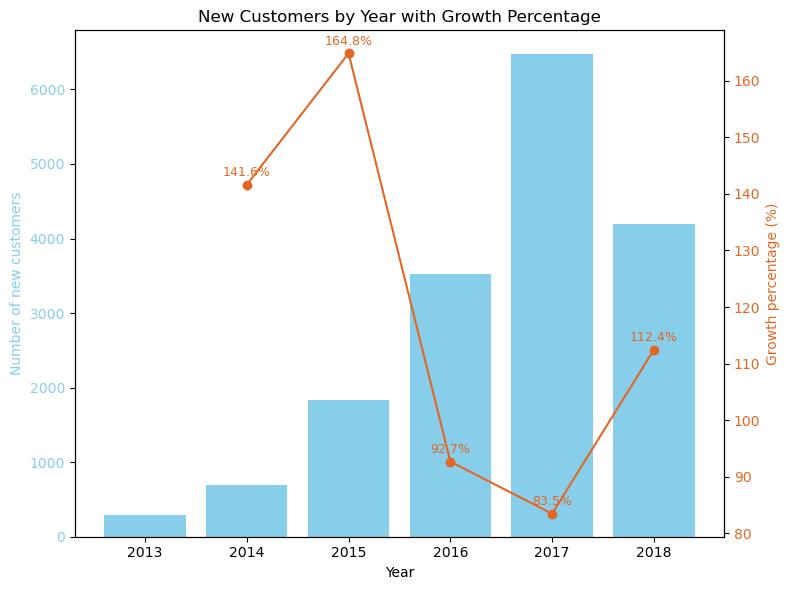

In [97]:
customer_yearly_count = customers.groupby('year').size().reset_index(name='customer_count')
customer_yearly_count['growth_pct'] = customer_yearly_count['customer_count'].pct_change() * 100

#Adjusting latest year growth to ytd growth
max_date = customers['became_member_on'].max()
prev_ytd = customers[(customers['year'] == max_date.year - 1) &
                      (
                        (customers['became_member_on'].dt.month < max_date.month) |
                        (
                            (customers['became_member_on'].dt.day <= max_date.day) &
                            (customers['became_member_on'].dt.month == max_date.month) 
                        )
                      )
]
prev_ytd_count = prev_ytd.shape[0]
ytd_count = customer_yearly_count[customer_yearly_count['year'] == max_date.year]['customer_count'].values[0]
ytd_growth_pct = ((ytd_count - prev_ytd_count) / prev_ytd_count) * 100
customer_yearly_count.loc[customer_yearly_count['year'] == max_date.year,'growth_pct'] = ytd_growth_pct

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))

years = customer_yearly_count['year']
counts = customer_yearly_count['customer_count']
growth = customer_yearly_count['growth_pct']

# Bar plot for customer count
ax1.bar(years, counts, color='skyblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of new customers', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('New Customers by Year with Growth Percentage')

# Line plot for growth percentage on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(years, growth, color='#E36724', marker='o', linestyle='-', label='Growth %')
ax2.set_ylabel('Growth percentage (%)', color='#E36724')
ax2.tick_params(axis='y', labelcolor='#E36724')

# Annotate growth percentage points
for x, y in zip(years, growth):
    if pd.notnull(y):
        ax2.text(x, y + 1, f'{y:.1f}%', color='#E36724', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

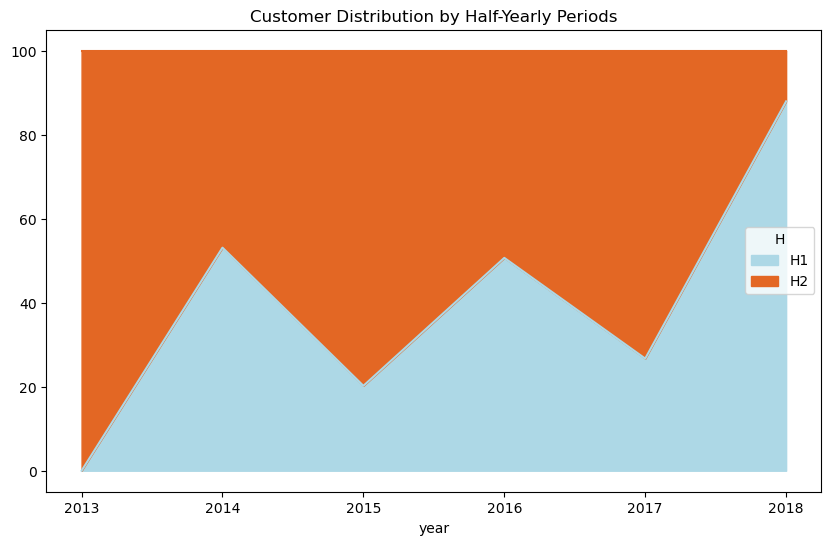

In [104]:
customers['month'] = customers['became_member_on'].dt.month
customers['H'] = np.where(customers['month'] <= 6, 'H1', 'H2')
halfyearly_counts = customers.groupby(['year', 'H']).size().reset_index(name='customer_count')
total_per_year = halfyearly_counts.groupby('year', observed=False)['customer_count'].transform('sum')
halfyearly_counts['pct'] = (halfyearly_counts['customer_count'] / total_per_year)*100

# Pivot to wide format: churn values as columns
halfyearly_pivot = halfyearly_counts.pivot(index='year', columns='H', values='pct').fillna(0)

#Generate area plot
colors = {
    'H1': 'lightblue',
    'H2': '#E36724'
}
halfyearly_pivot.plot(
    kind='area',
    stacked=True,
    figsize=(10, 6),
    color=[colors[col] for col in halfyearly_pivot.columns]  # apply mapping
)

plt.title('Customer Distribution by Half-Yearly Periods')
plt.tight_layout
plt.show()

In [72]:
prev_year['became_member_on'].dt.day.max()

26

- The cafe has achieved a steady growth in attracting new customers
- Growth percentage was peak in 2015 with 164.8%, but slowing down in the following years
- 2018 figure can be misleading as the data only covers upto July 2018

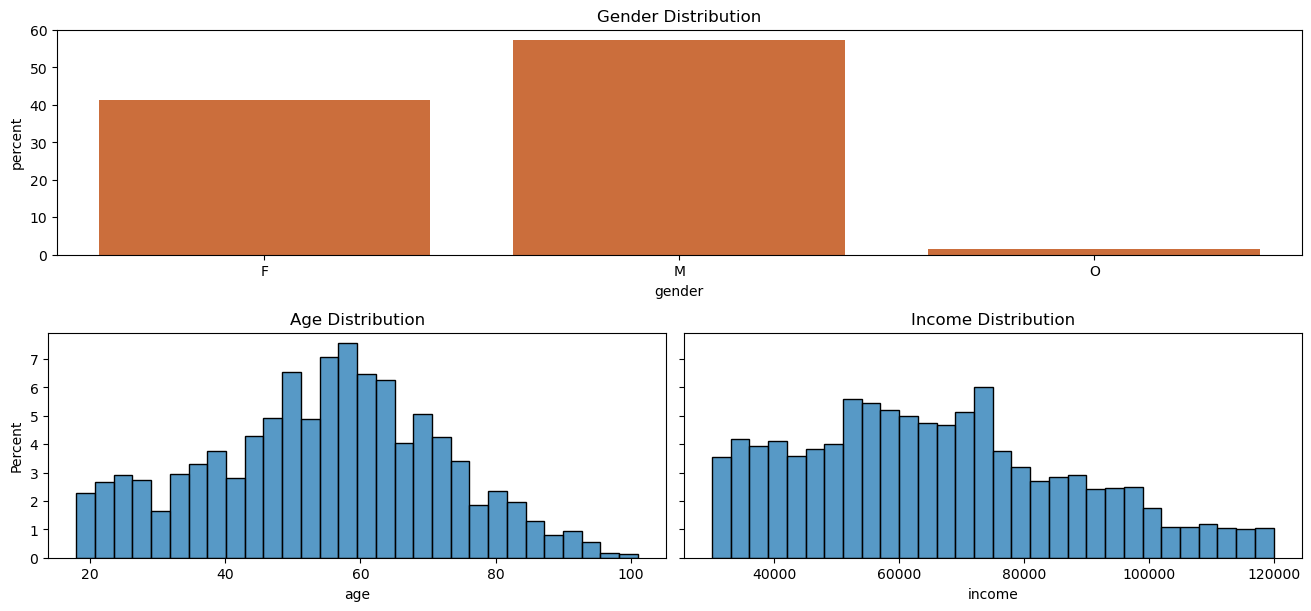

In [98]:
fig = plt.figure(layout='constrained', figsize=(13,6))
subfigs = fig.subfigures(2, 1)
axsTop = subfigs[0].subplots(1, 1)
axsBot = subfigs[1].subplots(1, 2, sharey=True)

# Left: Gender distribution
sns.countplot(data=customers_clean, x='gender', stat='percent', color='#E36724',ax=axsTop)
axsTop.set_title('Gender Distribution')

# Right: Age & Income Distribution
sns.histplot(data=customers_clean, x='age', stat='percent', bins=30, ax=axsBot[0])
axsBot[0].set_title('Age Distribution')

sns.histplot(data=customers_clean, x='income',stat='percent', bins=30, ax=axsBot[1])
axsBot[1].set_title('Income Distribution')

plt.show()

In [47]:
customers_clean[['age','income']].describe().round(2)

,age,income
count,14825.00,14825.00
mean,54.39,65404.99
std,17.38,21598.30
min,18.00,30000.00
25%,42.00,49000.00
50%,55.00,64000.00
75%,66.00,80000.00
max,101.00,120000.00


- The gender is not uniformly distributed with slightly male-skewed
- Age follows a normal distribution with mean and median almost perfectly align at 55
- Customer income follows a nearly-normal distribution but slightly right-skewed, indicating majority of the customer are not high income classes

In [48]:
#Received Promotions
promotion_received_summary = (
    promotion_received
    .groupby(['customer_id','offer_type','difficulty','reward'])
    .size()
    .reset_index(name='received_count')
)
received_pivot = promotion_received_summary.pivot_table(
    index='customer_id',
    columns=['offer_type','difficulty','reward'],
    values='received_count',
    fill_value=0
)
received_pivot.columns = [f'{col[0]}_{col[1]}_{col[2]}' for col in received_pivot.columns] #Flatten columns: ('bogo', 5, 5) → bogo_5_5
received_pivot['total'] = received_pivot.sum(axis=1)

#Completed Promotions
promotion_completed_summary = (
    promotion_completed
    .groupby(['customer_id','offer_type','difficulty','reward'])
    .size()
    .reset_index(name='completed_count')
)
completed_pivot = promotion_completed_summary.pivot_table(
    index='customer_id',
    columns=['offer_type','difficulty','reward'],
    values='completed_count',
    fill_value=0
)
completed_pivot.columns = [f'{col[0]}_{col[1]}_{col[2]}' for col in completed_pivot.columns] #Flatten columns: ('bogo', 5, 5) → bogo_5_5
completed_pivot['total'] = completed_pivot.sum(axis=1)

# Merge received and completed promotions and calculate completion rates
promo_summary = received_pivot.add_suffix('_received').merge(
    completed_pivot.add_suffix('_completed'),
    left_index=True,
    right_index=True,
    how='outer'
).fillna(0)
for col in received_pivot.columns:
    promo_summary[f'{col}_pct'] = (
        promo_summary[f'{col}_completed'] / promo_summary[f'{col}_received']
    ).replace([np.inf, np.nan], 0)
stats_df = pd.merge(
    promo_summary,
    customers_clean[['customer_id', 'age', 'income','gender','tenure']],
    on='customer_id',
    how='left'
)
stats_df.head()

,customer_id,bogo_5_5_received,bogo_10_10_received,discount_7_3_received,discount_10_2_received,discount_20_5_received,total_received,bogo_5_5_completed,bogo_10_10_completed,discount_7_3_completed,...,bogo_5_5_pct,bogo_10_10_pct,discount_7_3_pct,discount_10_2_pct,discount_20_5_pct,total_pct,age,income,gender,tenure
0,0009655768c64bdeb2e877511632db8f,1.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.00,33.0,72000.0,M,1.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.00,40.0,57000.0,O,0.0
3,0020c2b971eb4e9188eac86d93036a77,0.0,2.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,...,0.0,0.5,0.0,1.0,0.0,0.75,59.0,90000.0,F,2.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.00,24.0,60000.0,F,2.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7276\4035896698.py:5: RuntimeWarning: invalid value encountered in scalar divide
  promo: g[f'{promo}_completed'].sum() / g[f'{promo}_received'].sum()


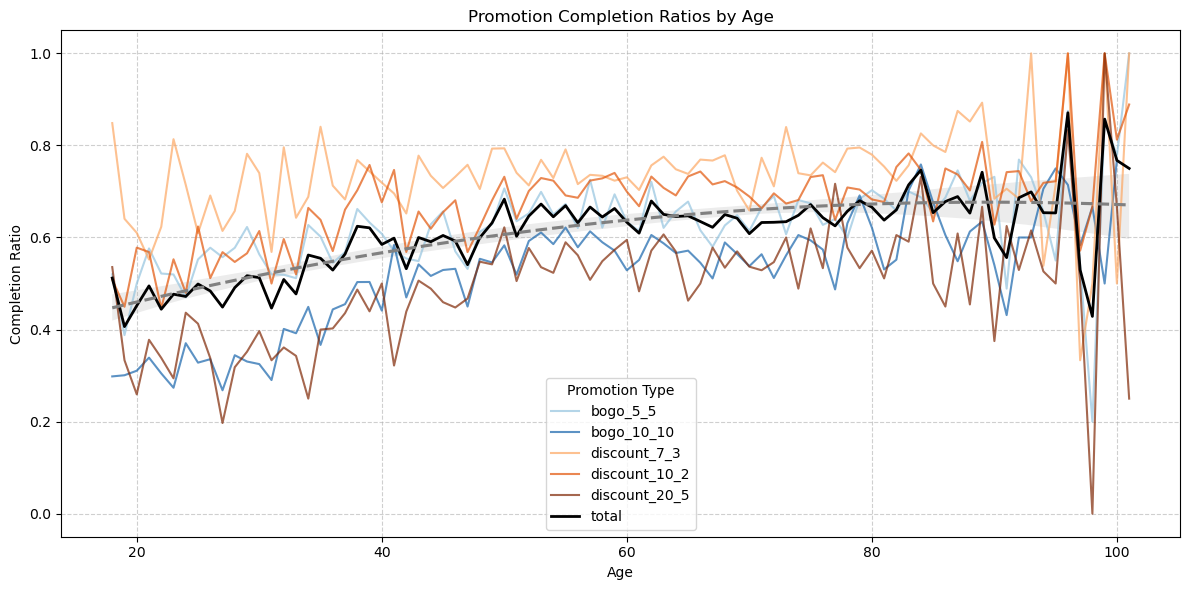

In [49]:
# Split cols based on promotion type
promos = ['bogo_5_5', 'bogo_10_10', 'discount_7_3', 'discount_10_2', 'discount_20_5', 'total']
def ratio_func(g):
    return pd.Series({
        promo: g[f'{promo}_completed'].sum() / g[f'{promo}_received'].sum()
        for promo in promos
    })

age_promo = stats_df.groupby('age').apply(ratio_func, include_groups=False)

import matplotlib.cm as cm

# Split columns by type
bogo_cols = [c for c in age_promo.columns if c.startswith('bogo_')]
discount_cols = [c for c in age_promo.columns if c.startswith('discount_')]
total_col = 'total'

# Generate color maps
bogo_colors = cm.Blues(np.linspace(0.4, 0.8, len(bogo_cols)))       # different blues
discount_colors = cm.Oranges(np.linspace(0.4, 1.0, len(discount_cols)))  # different oranges

plt.figure(figsize=(12, 6))

# Plot bogo columns
for col, color in zip(bogo_cols, bogo_colors):
    plt.plot(age_promo.index, age_promo[col], label=col, color=color, alpha= 0.7)

# Plot discount columns
for col, color in zip(discount_cols, discount_colors):
    plt.plot(age_promo.index, age_promo[col], label=col, color=color, alpha= 0.7)

# Plot total in black
if total_col in age_promo.columns:
    plt.plot(age_promo.index, age_promo[total_col], label=total_col, color='black', linewidth=2)
    sns.regplot(x=age_promo.index, y=age_promo[total_col], scatter=False, color='gray', line_kws={"linestyle":"--"},
                order=2 #quadratic trend line
    )

plt.xlabel('Age')
plt.ylabel('Completion Ratio')
plt.title('Promotion Completion Ratios by Age')
plt.legend(title='Promotion Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


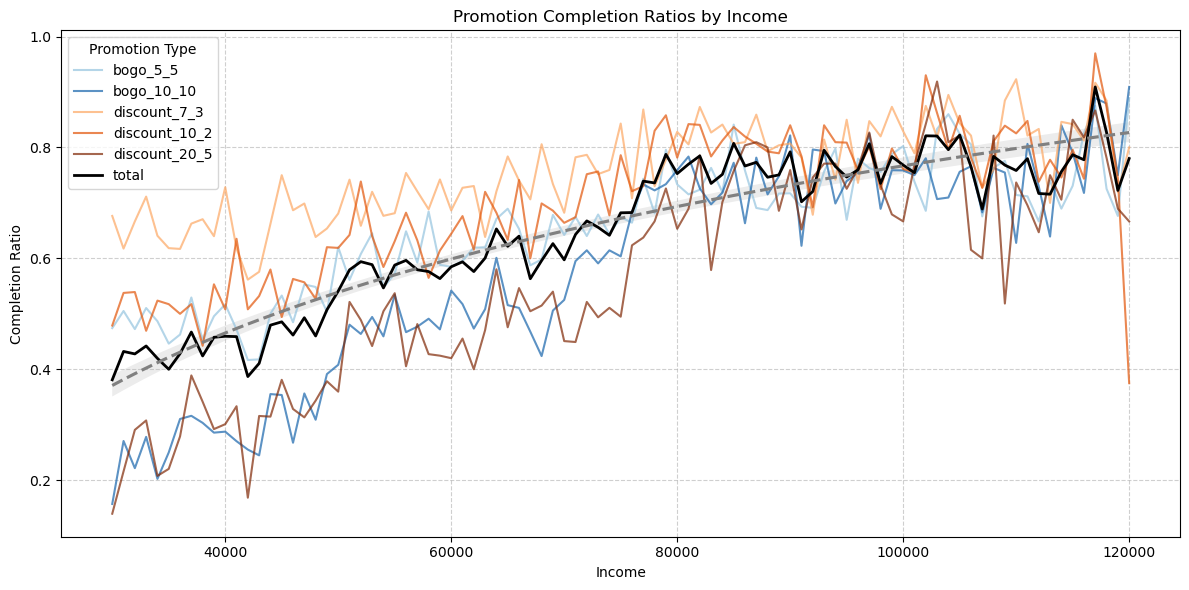

In [50]:
income_promo = stats_df.groupby('income').apply(ratio_func, include_groups=False)

plt.figure(figsize=(12, 6))
# Plot bogo columns
for col, color in zip(bogo_cols, bogo_colors):
    plt.plot(income_promo.index, income_promo[col], label=col, color=color, alpha= 0.7)

# Plot discount columns
for col, color in zip(discount_cols, discount_colors):
    plt.plot(income_promo.index, income_promo[col], label=col, color=color, alpha= 0.7)

# Plot total in black
if total_col in income_promo.columns:
    plt.plot(income_promo.index, income_promo[total_col], label=total_col, color='black', linewidth=2)
    sns.regplot(x=income_promo.index, y=income_promo[total_col], scatter=False, color='gray', line_kws={"linestyle":"--"},
                logx=True #log scale x-axis
    )

plt.xlabel('Income')
plt.ylabel('Completion Ratio')
plt.title('Promotion Completion Ratios by Income')
plt.legend(title='Promotion Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

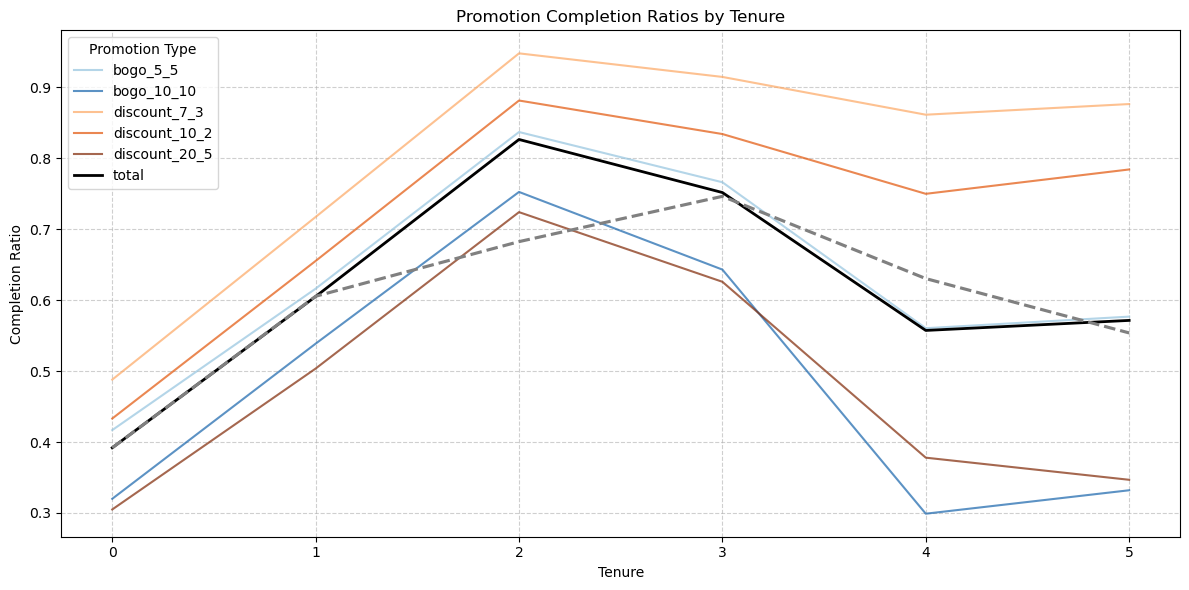

In [51]:
tenure_promo = stats_df.groupby('tenure').apply(ratio_func, include_groups=False)

plt.figure(figsize=(12, 6))
# Plot bogo columns
for col, color in zip(bogo_cols, bogo_colors):
    plt.plot(tenure_promo.index, tenure_promo[col], label=col, color=color, alpha= 0.7)

# Plot discount columns
for col, color in zip(discount_cols, discount_colors):
    plt.plot(tenure_promo.index, tenure_promo[col], label=col, color=color, alpha= 0.7)

# Plot total in black
if total_col in tenure_promo.columns:
    plt.plot(tenure_promo.index, tenure_promo[total_col], label=total_col, color='black', linewidth=2)
    sns.regplot(x=tenure_promo.index, y=tenure_promo[total_col], scatter=False, color='gray', line_kws={"linestyle":"--"},
                lowess=True #smooth trend line
    )

plt.xlabel('Tenure')
plt.ylabel('Completion Ratio')
plt.title('Promotion Completion Ratios by Tenure')
plt.legend(title='Promotion Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

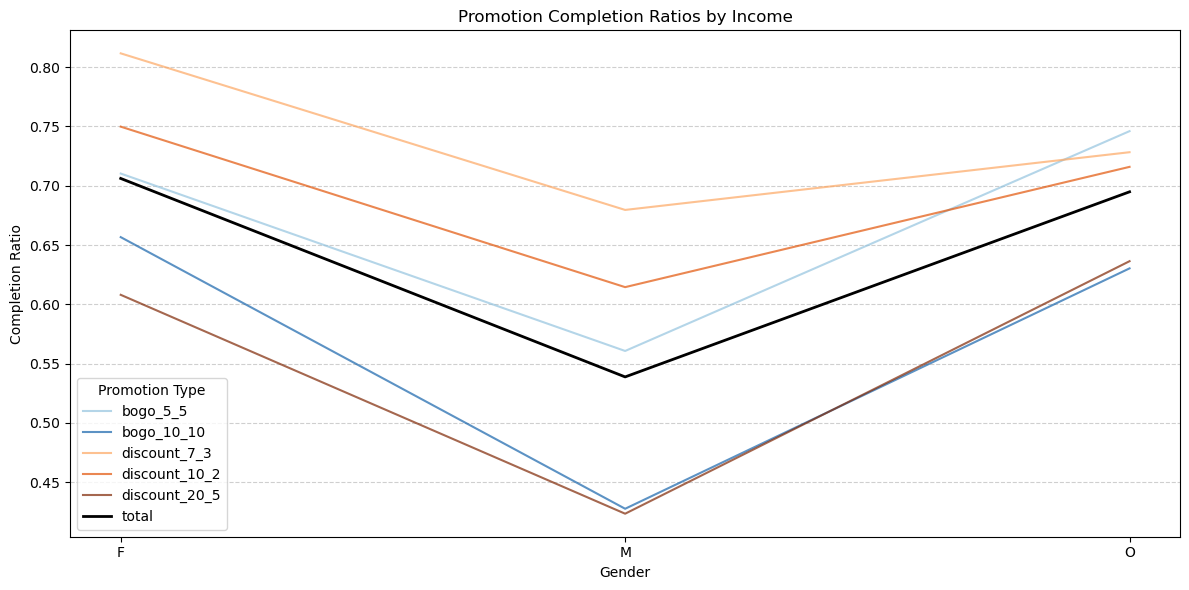

In [52]:
gender_promo = stats_df.groupby('gender').apply(ratio_func, include_groups=False)

plt.figure(figsize=(12, 6))
# Plot bogo columns
for col, color in zip(bogo_cols, bogo_colors):
    plt.plot(gender_promo.index, gender_promo[col], label=col, color=color, alpha= 0.7)

# Plot discount columns
for col, color in zip(discount_cols, discount_colors):
    plt.plot(gender_promo.index, gender_promo[col], label=col, color=color, alpha= 0.7)

# Plot total in black
if total_col in gender_promo.columns:
    plt.plot(gender_promo.index, gender_promo[total_col], label=total_col, color='black', linewidth=2)

plt.xlabel('Gender')
plt.ylabel('Completion Ratio')
plt.title('Promotion Completion Ratios by Income')
plt.legend(title='Promotion Type')
plt.grid(True, linestyle='--', alpha=0.6, axis = 'y')
plt.tight_layout()
plt.show()

In [53]:
# Export to csv to load to SQL-server
promotion_received[['customer_id', 'offer_id', 'time']].to_csv('promotion_received.csv', index=False)
promotion_completed[['customer_id', 'offer_id', 'time']].to_csv('promotion_completed.csv', index=False)

In [54]:
received_completed_match = pd.read_csv('received_completed_match.csv')
print('Total promotions:', received_completed_match.shape[0])
print('Total promotion completed:', received_completed_match['complete_flag'].sum())
print("Receive: ",promotion_received.shape[0])
print("Complete: ",promotion_completed.shape[0])

Total promotions: 61042
Total promotion completed: 33579
Receive:  61042
Complete:  33579


In [56]:
received_completed_match_temp = pd.merge(
    received_completed_match,
    customers,
    how='left',
    on='customer_id'
)
received_completed_match_temp = pd.merge(
    received_completed_match_temp,
    offers,
    how='left',
    on='offer_id'
)
received_completed_match_final = received_completed_match_temp[['gender','age','income','tenure','offer_type','difficulty','reward','complete_flag']]


In [57]:
received_completed_match_final.groupby('complete_flag').agg({
    'gender': lambda x: x.isna().sum() / len(x),
    'income': lambda x: x.isna().sum() / len(x),
})

,gender,income
complete_flag,,
0,0.244183,0.244183
1,0.033801,0.033801


In [58]:
print('Completion rate:', received_completed_match_final['complete_flag'].mean().round(3))
print('Completion rate clean:', received_completed_match_final.dropna()['complete_flag'].mean().round(3))

Completion rate: 0.55
Completion rate clean: 0.61


In [59]:
df_model = received_completed_match_final.dropna().copy()
numerical_cols = ['age', 'income', 'tenure', 'difficulty', 'reward']
categorical_cols = ['gender', 'offer_type']

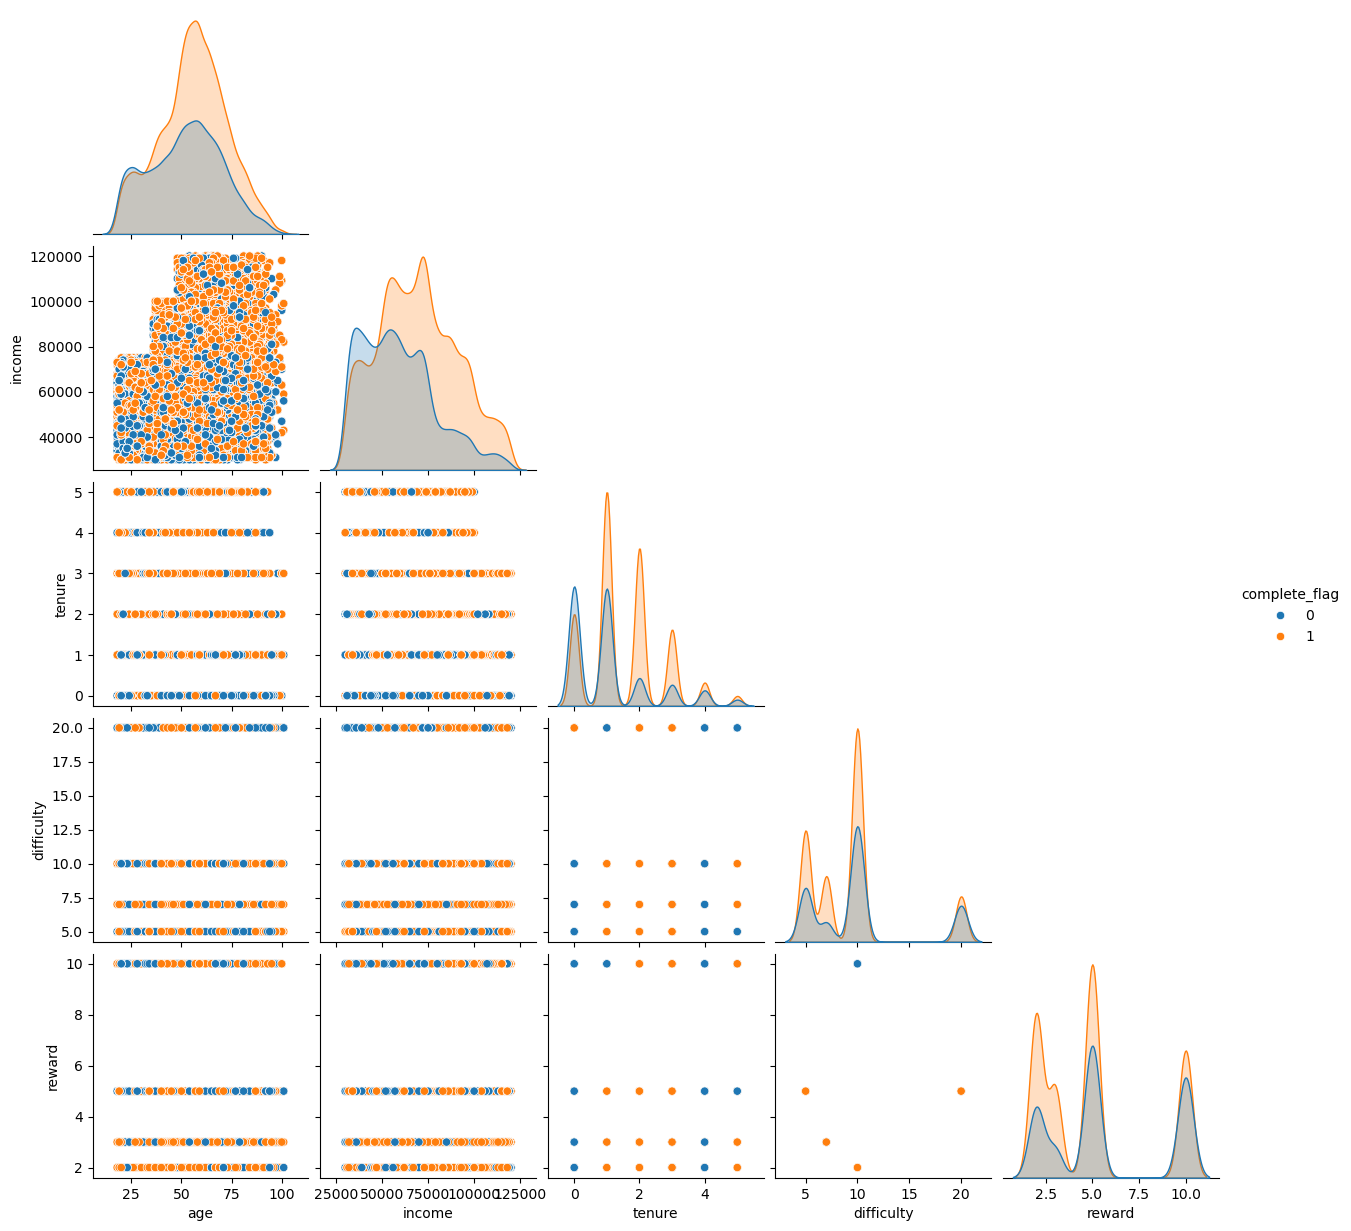

In [60]:
sns.pairplot(df_model, hue='complete_flag', vars=numerical_cols, diag_kind='kde', corner=True)
plt.show()

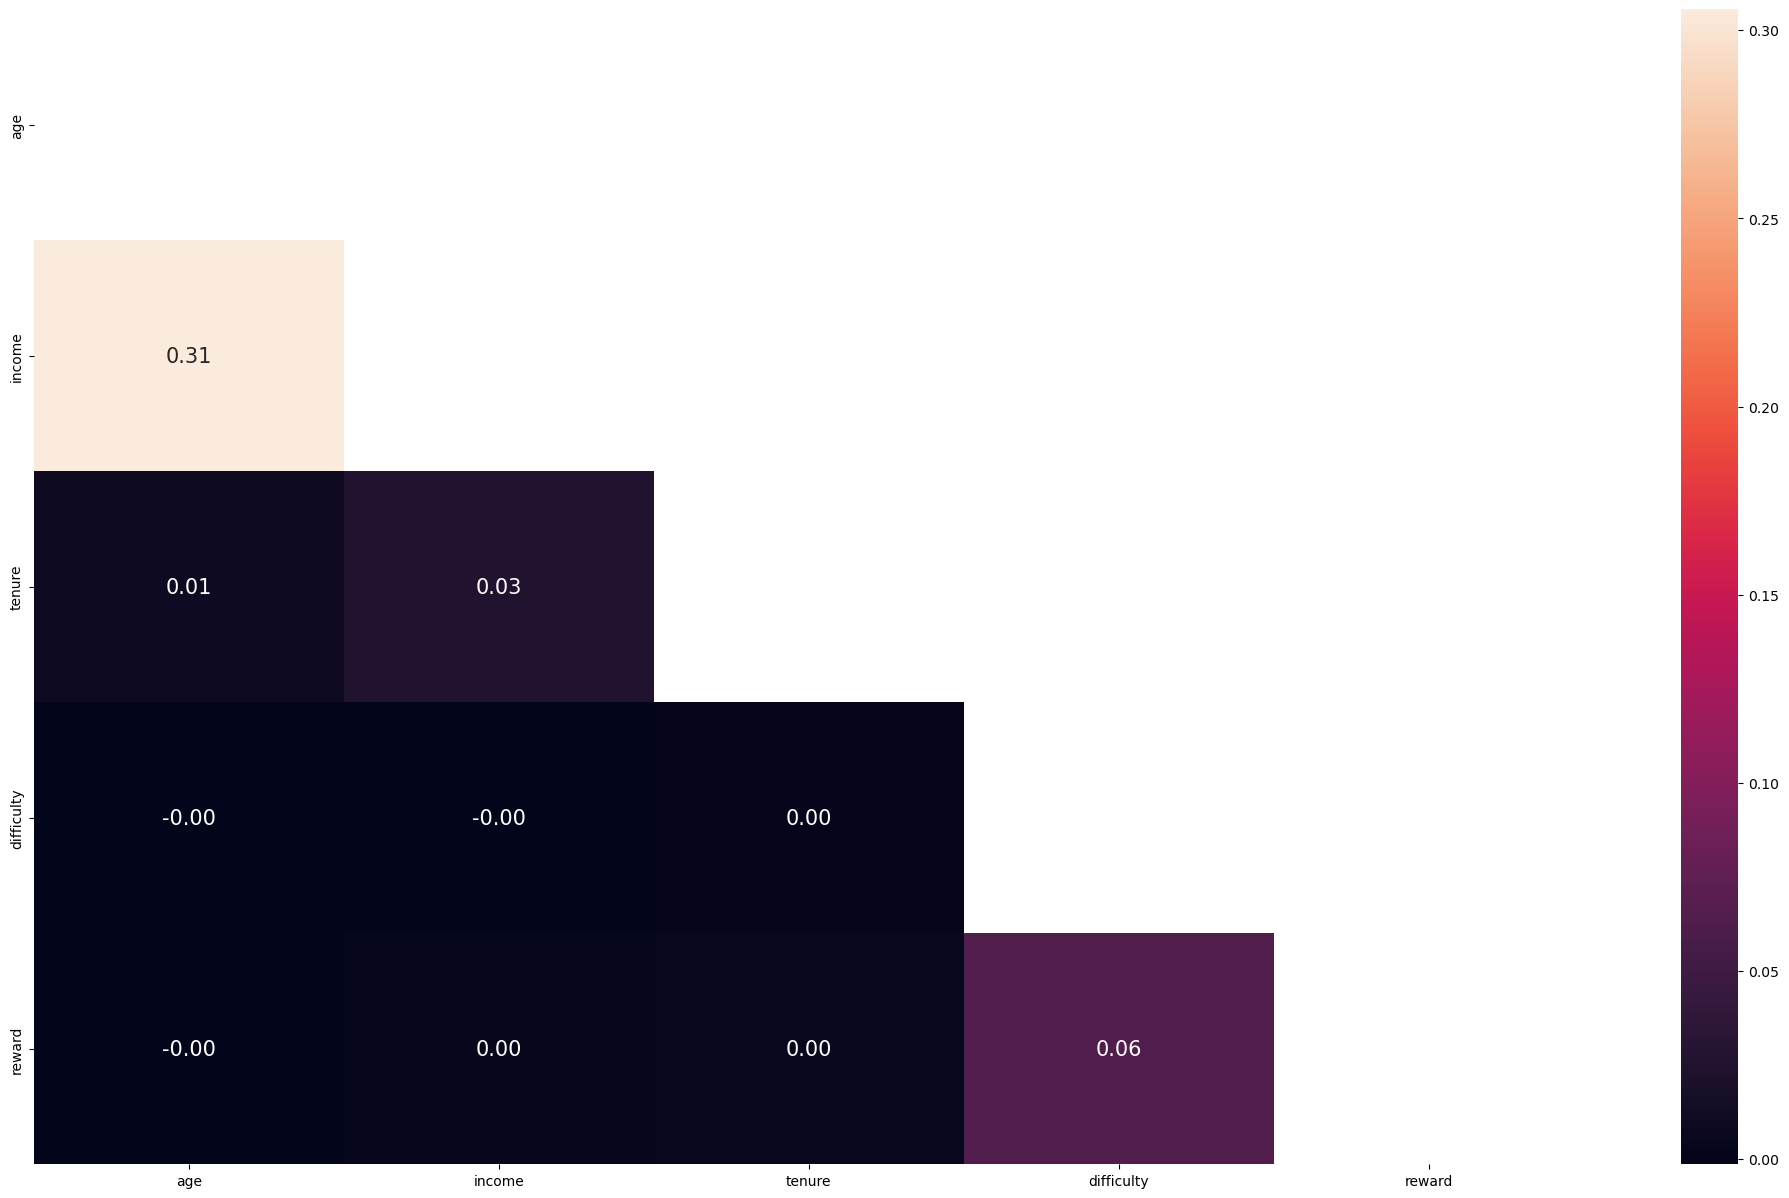

In [61]:
#Correlation Matrix
corr = df_model[numerical_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) #Use to hide duplicated correlations
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True, mask=mask,fmt=".2f", annot_kws={"size": 15})
plt.show()

In [62]:
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

np.random.seed(30) #Set seed to ensure consistent result

#Defining dependent and independent variables
X = df_model.drop(columns='complete_flag')
y = df_model['complete_flag']

#Preprocessing categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
ohetransform = ohe.fit_transform(X[categorical_cols])
X =pd.concat([X[numerical_cols], ohetransform], axis=1)

# Building Logistic Regression Model
log_reg = sm.Logit(y, sm.add_constant(X)).fit()

# Model summary
print(log_reg.summary())

# Extract coefficients and confidence intervals
params = log_reg.params
conf = log_reg.conf_int()
conf['coef'] = params

# Exponentiate to get odds ratios
odds_ratios = np.exp(conf)
odds_ratios.columns = ['2.5%', '97.5%', 'OR']  # rename for clarity
odds_ratios = odds_ratios[['OR', '2.5%', '97.5%']]  # reorder columns

print("\nOdds Ratios with 95% CI:\n")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.595643
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          complete_flag   No. Observations:                53201
Model:                          Logit   Df Residuals:                    53192
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Sep 2025   Pseudo R-squ.:                  0.1094
Time:                        08:52:08   Log-Likelihood:                -31689.
converged:                       True   LL-Null:                       -35582.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7857      0.059    -13.409      0.000      -0.901      -0.671
ag

In [63]:
# Congifugratering independent variables with non-linear terms
X_2 = X.copy()
X_2['age_sq'] = X_2['age'] ** 2 # Adding a squared term for tenure to capture non-linear effects
X_2['tenure_sq'] = X['tenure'] ** 2 # Adding a squared term for tenure to capture non-linear effects
X_2['log_income'] = np.log1p(X_2['income']) # Adding a log-transformed income+1 to capture non-linear effects
X_2 = X_2[['age','age_sq','log_income','tenure','tenure_sq','difficulty','gender_M','gender_O','offer_type_discount']]

# Building Logistic Regression Model
log_reg_2 = sm.Logit(y, sm.add_constant(X_2)).fit()

# Model summary
print(log_reg_2.summary())

# Extract coefficients and confidence intervals
params = log_reg_2.params
conf = log_reg_2.conf_int()
conf['coef'] = params

# Exponentiate to get odds ratios
odds_ratios = np.exp(conf)
odds_ratios.columns = ['2.5%', '97.5%', 'OR']  # rename for clarity
odds_ratios = odds_ratios[['OR', '2.5%', '97.5%']]  # reorder columns

print("\nOdds Ratios with 95% CI:\n")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.576826
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          complete_flag   No. Observations:                53201
Model:                          Logit   Df Residuals:                    53191
Method:                           MLE   Df Model:                            9
Date:                Thu, 04 Sep 2025   Pseudo R-squ.:                  0.1375
Time:                        08:52:09   Log-Likelihood:                -30688.
converged:                       True   LL-Null:                       -35582.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -13.8941      0.336    -41.335      0.000     -14.553     -13.235
ag